# Example 1

## The effect of varying query vector q

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the softmax function
def softmax(x):
    exp_x = np.exp(x)
    return exp_x / exp_x.sum()

def softmax_perturbed(x, eps):
    exp_x = np.exp(x)
    return exp_x / add_noise(exp_x.sum(), eps)

##  Define the attention block A(q) = softmax(qK)

In [4]:
def add_noise(q, epsilon):
    return q * (1+np.random.uniform(-epsilon, epsilon, q.shape)) #np.round(q/epsilon)*epsilon

import numpy as np
import matplotlib.pyplot as plt

# Define the softmax function
def softmax(x):
    exp_x = np.exp(x)
    return exp_x / exp_x.sum()

def attention_block(q, K):
    # Multiply query vector q by key matrix K
    qK = np.dot(q,K)
    # Apply softmax to qK
    return softmax(qK)

def attention_block_no_softmax(q, K):
    # Multiply query vector q by key matrix K
    qK = np.dot(q,K)
    # Apply softmax to qK
    return qK

def attention_block_perturbed(q, K, eps):
    # Multiply query vector q by key matrix K
    qK = add_noise(np.dot(q, K), eps)
    # Apply softmax to qK
    return add_noise(softmax_perturbed(qK,eps), eps)

def attention_block_perturbed_no_softmax(q, K, eps):
    # Multiply query vector q by key matrix K
    qK = add_noise(np.dot(q, K), eps)
    # Apply softmax to qK
    return qK

## Function to compute relative error between two vectors

In [7]:
# Function to compute relative error between two vectors
def relative_error(A, A_perturbed):
    return np.abs(A - A_perturbed) / np.abs(A)

## Define the input query vector q and the key matrix K

In [15]:
n = 3   # dimension of q
m = 5  # number of keys (columns in K)
q = np.random.rand(n)  # random query vector
K = np.random.rand(n, m)  # random key matrix



## Compute the attention block output with the original query q

In [18]:
A_q = attention_block(q, K)
A_q



array([0.31512391, 0.14963038, 0.14682855, 0.1926072 , 0.19580996])

## Define different epsilon values for small changes and compute the new attention

In [21]:
epsilons = [1e-5, 1e-6, 1e-7, 1e-17]
relative_errors_matrix = np.zeros((len(epsilons), len(A_q)))
for idx, epsilon in enumerate(epsilons):
    A_q_perturbed = attention_block_perturbed(q, K, epsilon)
    # Compute the relative error between A(q) and A(perturbed q)
    error = relative_error(A_q, A_q_perturbed)
    relative_errors_matrix[idx, :] = error
print("Relative Error Matrix:\n", relative_errors_matrix)    

Relative Error Matrix:
 [[9.88973779e-06 1.19864376e-05 8.24573078e-06 6.54467107e-07
  1.09662860e-05]
 [4.46769603e-07 8.50510413e-07 2.58552357e-07 4.63642507e-07
  9.12463137e-07]
 [2.33029834e-08 9.38772742e-08 5.26752951e-08 1.01042334e-07
  4.95014598e-08]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]]


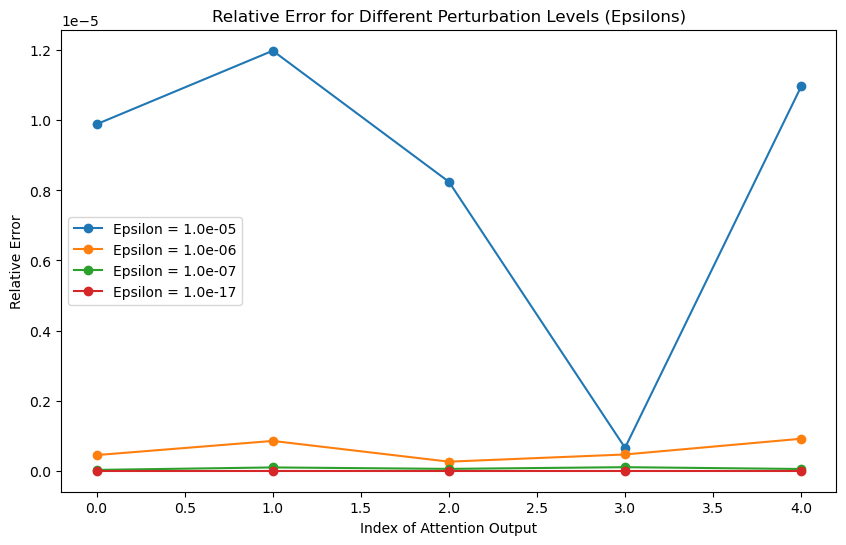

In [23]:
labels = [f"Epsilon = {epsilon:.1e}" for epsilon in epsilons]
# Create a plot
plt.figure(figsize=(10, 6))
# Plot each row (relative errors) in the same figure
for idx, epsilon in enumerate(epsilons):
    plt.plot(relative_errors_matrix[idx, :], label=labels[idx], marker='o')  # Plot each row with markers
# Add labels and title
plt.xlabel("Index of Attention Output")
plt.ylabel("Relative Error")
plt.title("Relative Error for Different Perturbation Levels (Epsilons)")
# Add legend to distinguish each epsilon
plt.legend()
# Display the plot
plt.show()


# Example 2

## Compare error amplification for deep network with softmax and without.

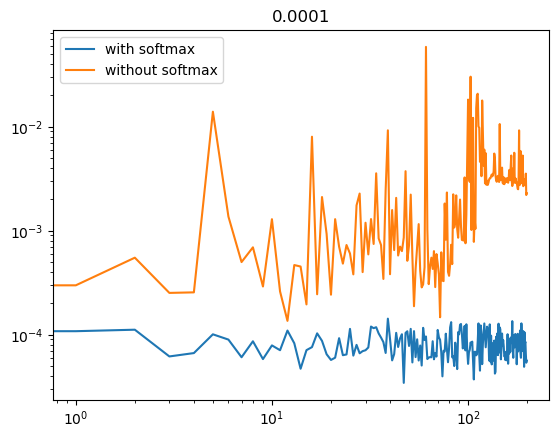

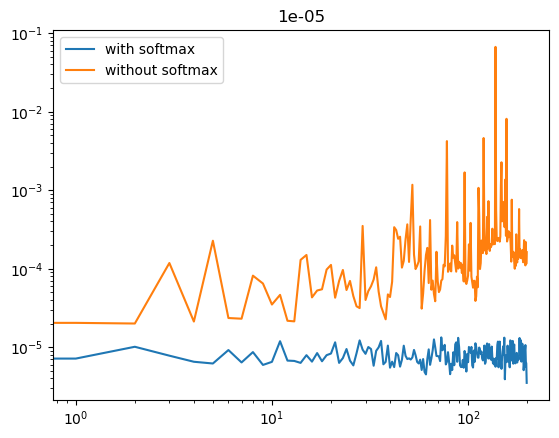

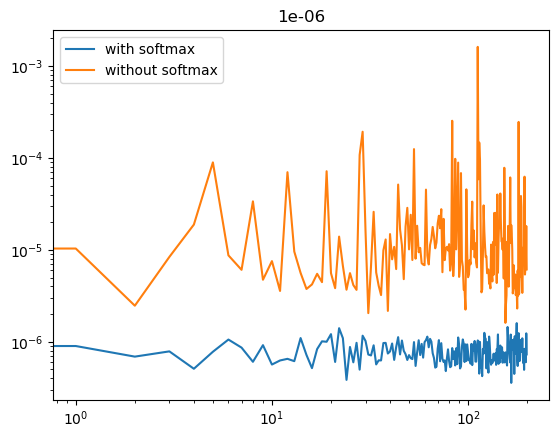

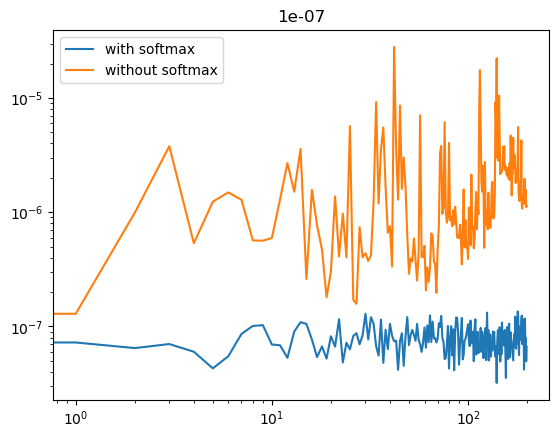

In [27]:
# Set parameters
m = 10  # Input dimension

alpha = 2
L = 200

epsilons = [1e-4, 1e-5, 1e-6, 1e-7]
relative_errors = np.zeros(len(epsilons))
relative_errors_all = np.zeros([len(epsilons), L, m])
relative_errors_no_softmax = np.zeros(len(epsilons))
relative_errors_all_no_softmax = np.zeros([len(epsilons), L, m])

for idx, epsilon in enumerate(epsilons):
    q = np.zeros(m)  # Random query vector
    q[0] = 1
    q_ns = q.copy()
    q_p = add_noise(q, epsilon)
    q_p_ns = q_ns.copy()
    
    for k in range(L):
        
        K1 = np.diag(np.random.uniform(0,alpha, m))@np.random.normal(0,1/np.sqrt(m),[m,m])
        #K1 /= np.linalg.norm(K1, 1)  # Normalize to ||K1|| = 1
        q = attention_block(q, K1)
        q_ns =  attention_block_no_softmax(q_ns, K1)
        q_p = attention_block_perturbed(q_p, add_noise(K1, epsilon), epsilon)
        q_p_ns = attention_block_perturbed_no_softmax(q_p_ns, add_noise(K1, epsilon), epsilon)
        #print(q)
        
        relative_errors_all[idx, k, :] = (q-q_p)/q
        relative_errors_all_no_softmax[idx, k, :] = (q_ns-q_p_ns)/q_ns
    
    relative_errors[idx] = np.linalg.norm(relative_error(q, q_p))
    relative_errors_no_softmax[idx] = np.linalg.norm(relative_error(q_ns, q_p_ns))
    
    plt.figure()
    plt.loglog(range(L), np.sqrt(np.sum(np.abs(relative_errors_all[idx, :, :])**2/m, axis = 1)), label = 'with softmax')
    plt.loglog(range(L), np.sqrt(np.sum(np.abs(relative_errors_all_no_softmax[idx, :, :])**2/m, axis = 1)), label = 'without softmax')  
    
    plt.legend()
    plt.title(epsilon)
